In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x=[]


In [3]:
def calcular_idn(X):#índice de dispersión normalizado (IDN):

    n = len(X)
# calcular min y max
    minimo = min(X)
    maximo = max(X)
 #Estandarización min-max usando for
    Z = []
    for x in X:
        z = (x - minimo) / (maximo - minimo)
        Z.append(z)

#Promedio de Z
    suma = 0
    for z in Z:
        suma += z
    prom = suma / n

#Calcular IDN
    suma_cuadrados = 0
    for z in Z:
        suma_cuadrados += (z - prom) ** 2
    idn = suma_cuadrados / n

    return idn


# Vector
X = [12.4, 8.1, 15.7, 9.3, 14.8, 10.2, 11.6]

# Calcular IDN
resultado = calcular_idn(X)
print(resultado)

0.11642828876703037


2. Se tiene la siguiente relación entre las variables X,Y,Z

Visualice la función $Z=F
 en el dominio , en el caso de que

, entonces . Para este ejercicio evalue la función en una malla de 500 puntos en cada dirección.



In [4]:
#creamos la malla
x = np.linspace(-10, 10, 500)
y = np.linspace(-10, 10, 500)
X,Y = np.meshgrid(x,y)
r= X+Y

In [5]:
#Inicializar matriz Z
Z = np.zeros_like(r)

In [6]:
# Calcular la función f dando las regiones de la función a trozos
region_1 = (X + Y) <= 1/2
#region_2 = (X + Y) > 1/2 = ~region_1

In [7]:
Z[region_1]=20
Z[~region_1]=np.exp(np.exp(np.cos(r[~region_1])-2*np.arctan(np.sin(r[~region_1]))))

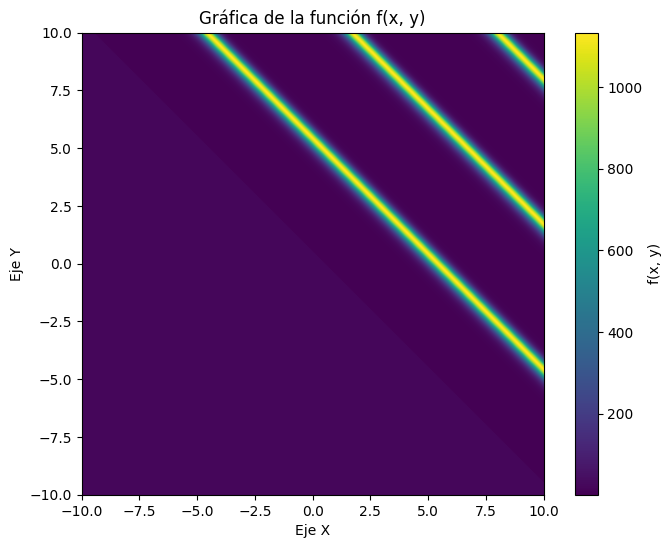

In [8]:
#grafica para la función
plt.figure(figsize=(8, 6))
plt.imshow(Z, extent=[-10, 10, -10, 10], origin='lower', cmap='viridis')
plt.colorbar(label='f(x, y)')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Gráfica de la función f(x, y)')
plt.grid(False)
plt.show()

3. Utilice los datos de los nacimientos por estado del 2020 al 2022 del repositorio en Github y realice lo siguiente:

#a) Obtenga un Dataframe que tenga como columnas el número de nacimientos de mujeres, el número de nacimientos de hombres y el número total de nacimientos por año durante el 2020 al 2022. Obtenga una gráfica de cada categoría.

# b) Agregue a los datos de nacimientos del 2020 la columna de población por estado y la tasa de nacimientos por cada mil habitantes. Gráfique la tasa de nacimientos por estado.

In [9]:
ruta='https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/nacimientos_2020.csv'
n_2020=pd.read_csv(ruta,index_col='Estado')
n_2020.head()

,Abreviatura,Regiones,Mujeres,Hombres,No_esp,Total
Estado,,,,,,
Aguascalientes,AG,Noreste,9966,10404,0,20370
Baja California,BC,Noroeste,23539,24406,0,47945
Baja California Sur,BS,Noroeste,4982,5099,0,10081
Campeche,CM,Sureste,5275,5454,0,10729
Coahuila de Zaragoza,CO,Noreste,22594,23221,0,45815


In [10]:
ruta='https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/nacimientos_2021.csv'
n_2021=pd.read_csv(ruta,index_col='Estado')
n_2021.head()

,Abreviatura,Regiones,Mujeres,Hombres,No_esp,Total
Estado,,,,,,
Aguascalientes,AG,Noreste,11266,11801,0,23067
Baja California,BC,Noroeste,29364,29651,0,59015
Baja California Sur,BS,Noroeste,5084,5158,0,10242
Campeche,CM,Sureste,7049,7246,0,14295
Coahuila de Zaragoza,CO,Noreste,23326,23802,0,47128


In [11]:
ruta='https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/nacimientos_2022.csv'
n_2022=pd.read_csv(ruta,index_col='Estado')
n_2022.head()

,Abreviatura,Regiones,Mujeres,Hombres,No_esp,Total
Estado,,,,,,
Aguascalientes,AG,Noreste,10410,10796,0,21206
Baja California,BC,Noroeste,29944,30732,0,60676
Baja California Sur,BS,Noroeste,5396,5732,0,11128
Campeche,CM,Sureste,6841,7049,0,13890
Coahuila de Zaragoza,CO,Noreste,22835,23471,0,46306


In [12]:
datos_total= pd.concat([n_2020, n_2021, n_2022]) #concat solo une dataframe o series
datos_total.head()

,Abreviatura,Regiones,Mujeres,Hombres,No_esp,Total
Estado,,,,,,
Aguascalientes,AG,Noreste,9966,10404,0,20370
Baja California,BC,Noroeste,23539,24406,0,47945
Baja California Sur,BS,Noroeste,4982,5099,0,10081
Campeche,CM,Sureste,5275,5454,0,10729
Coahuila de Zaragoza,CO,Noreste,22594,23221,0,45815


In [13]:
 datos1 = pd.DataFrame(datos_total, columns=['Hombres','Mujeres','Total'])
 datos1.head()

,Hombres,Mujeres,Total
Estado,,,
Aguascalientes,10404,9966,20370
Baja California,24406,23539,47945
Baja California Sur,5099,4982,10081
Campeche,5454,5275,10729
Coahuila de Zaragoza,23221,22594,45815


In [14]:
datos1 =datos1.sort_values(by='Estado')
datos1.head()

,Hombres,Mujeres,Total
Estado,,,
Aguascalientes,10404,9966,20370
Aguascalientes,11801,11266,23067
Aguascalientes,10796,10410,21206
Baja California,24406,23539,47945
Baja California,29651,29364,59015


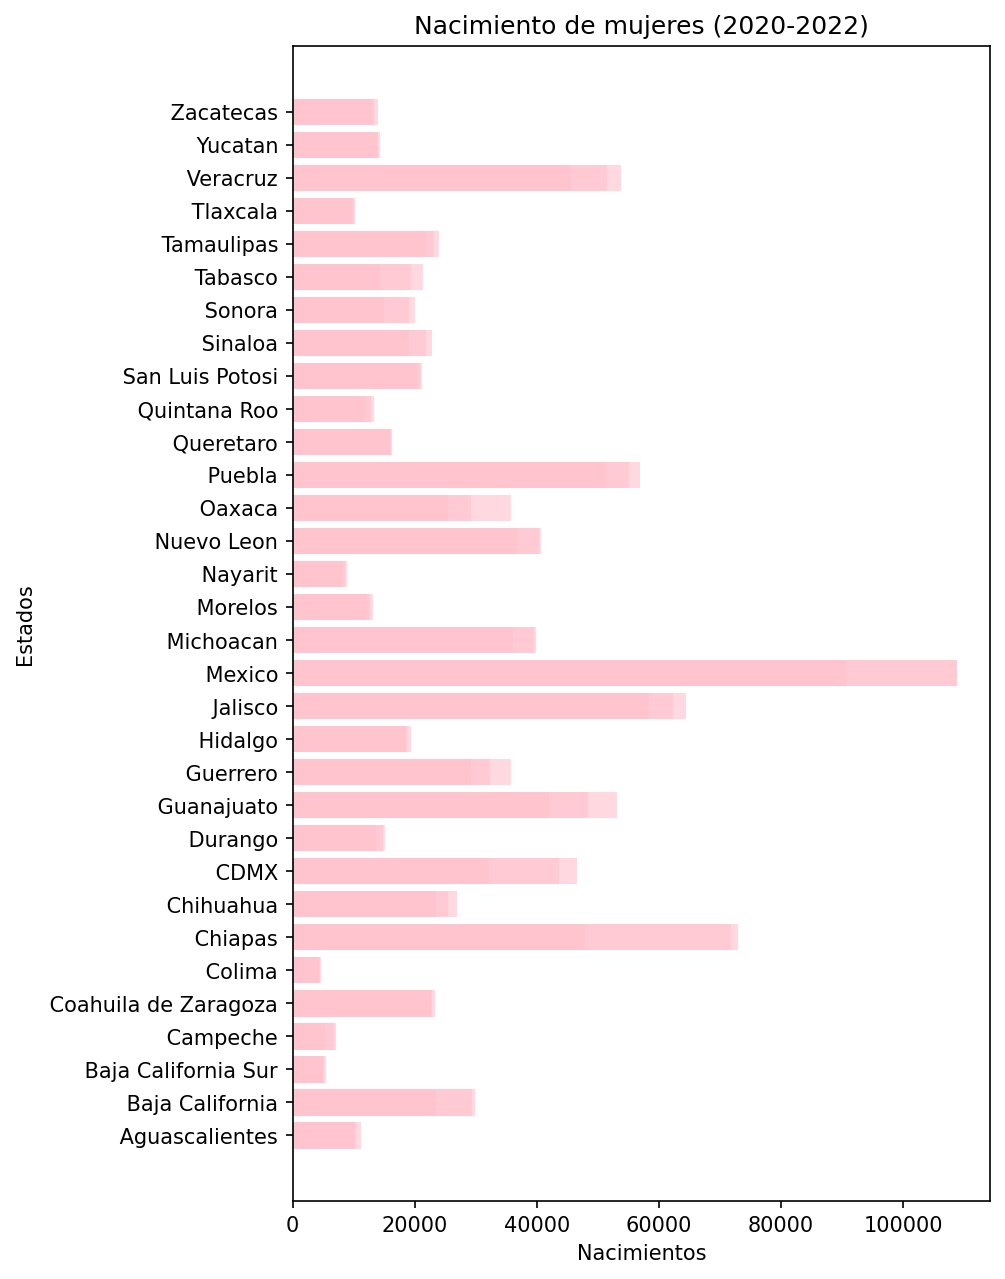

In [15]:
plt.figure(figsize=(6, 10), dpi=150)
plt.barh(datos_total.index, datos_total['Mujeres'], color = 'pink', alpha=0.6)
plt.title('Nacimiento de mujeres (2020-2022)')
plt.ylabel('Estados')
plt.xlabel('Nacimientos')
plt.show()

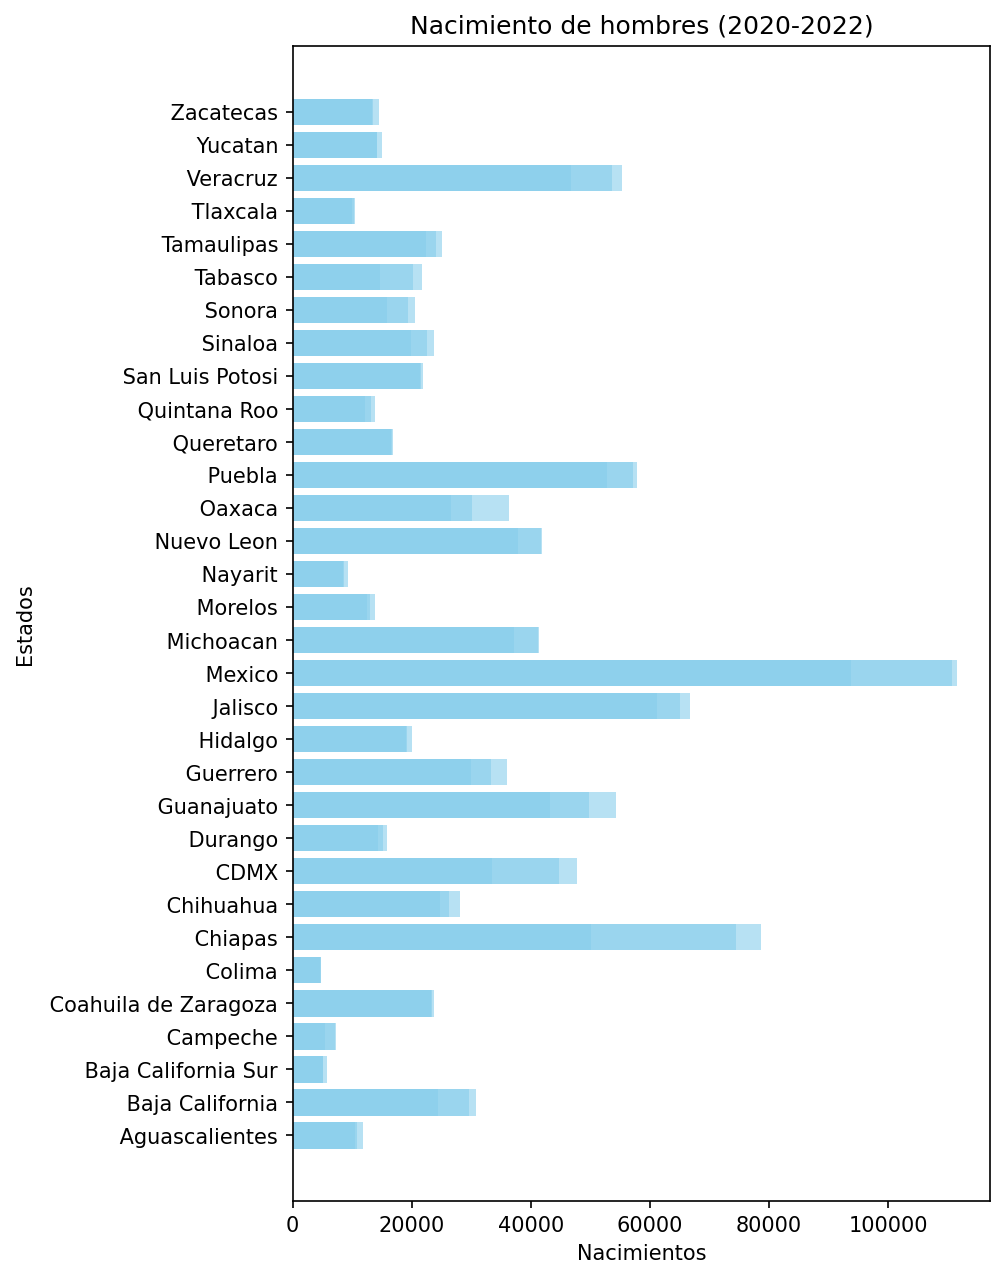

In [16]:
plt.figure(figsize=(6, 10), dpi=150)
plt.barh(datos_total.index, datos_total['Hombres'], color = 'skyblue', alpha=0.6)
plt.title('Nacimiento de hombres (2020-2022)')
plt.ylabel('Estados')
plt.xlabel('Nacimientos')
plt.show()

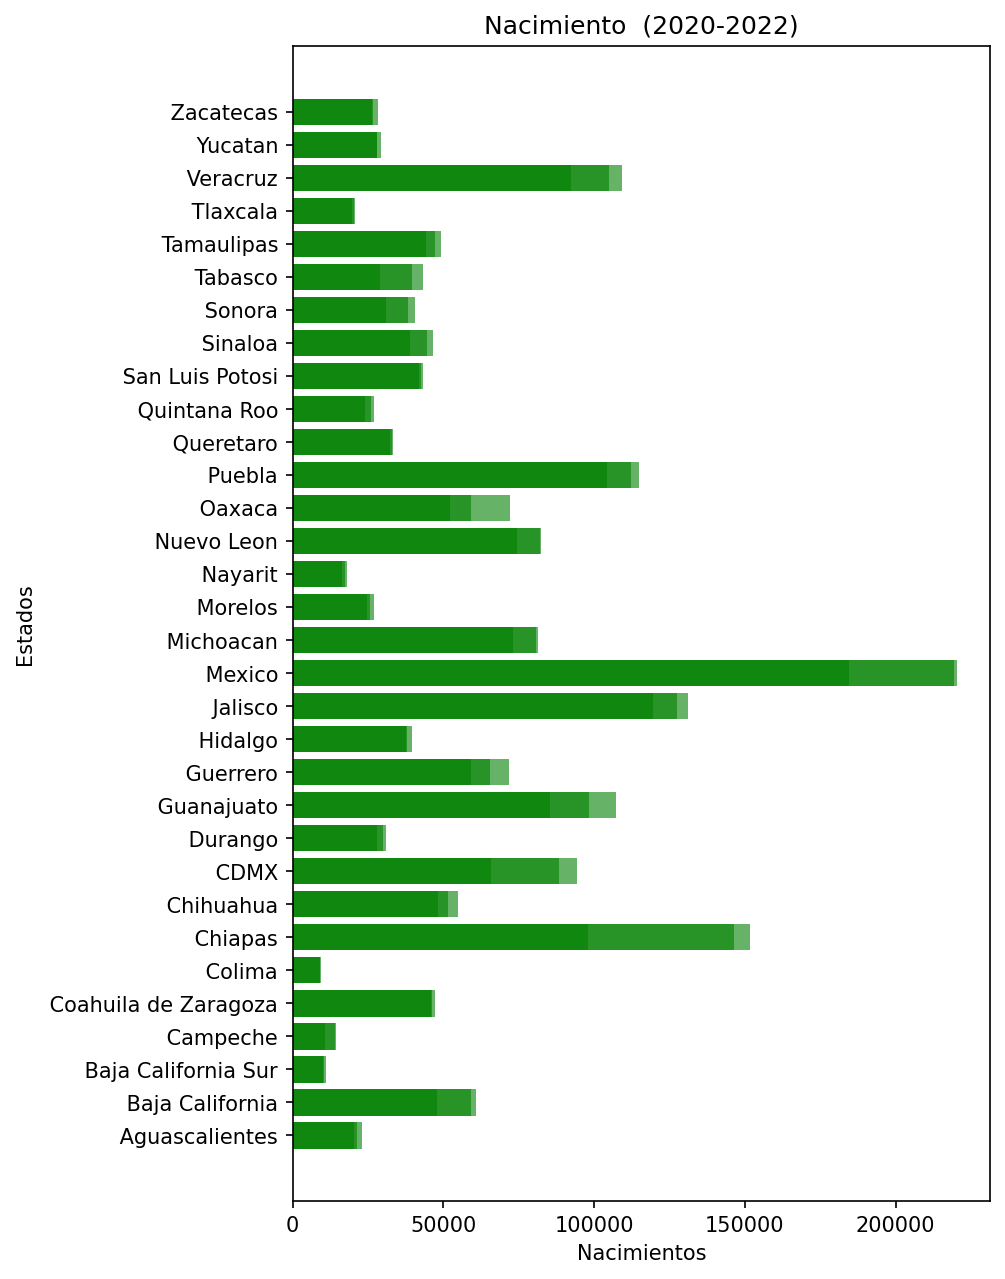

In [17]:
plt.figure(figsize=(6, 10), dpi=150)
plt.barh(datos_total.index, datos_total['Total'], color = 'green', alpha=0.6)
plt.title('Nacimiento  (2020-2022)')
plt.ylabel('Estados')
plt.xlabel('Nacimientos')
plt.show()

***b) Agregue a los datos de nacimientos del 2020 la columna de población por estado y la tasa de nacimientos por cada mil habitantes. Gráfique la tasa de nacimientos por estado.***

In [18]:
ruta='https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/nacimientos_2020.csv'
n_2020=pd.read_csv(ruta,index_col='Estado')
n_2020.head()

,Abreviatura,Regiones,Mujeres,Hombres,No_esp,Total
Estado,,,,,,
Aguascalientes,AG,Noreste,9966,10404,0,20370
Baja California,BC,Noroeste,23539,24406,0,47945
Baja California Sur,BS,Noroeste,4982,5099,0,10081
Campeche,CM,Sureste,5275,5454,0,10729
Coahuila de Zaragoza,CO,Noreste,22594,23221,0,45815


In [19]:
ruta_poblacion = 'https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/poblacion.csv'
df_poblacion = pd.read_csv(ruta_poblacion,index_col='Estado')
df_poblacion.head()

,Regiones,H_1990,M_1990,H_2000,M_2000,H_2010,M_2010,H_2020,M_2020
Estado,,,,,,,,,
Aguascalientes,Noreste,350218,369441,456533,487752,576638,608358,696683,728924
Baja California,Noroeste,832090,828765,1252581,1234786,1591610,1563460,1900589,1868431
Baja California Sur,Noroeste,161833,155931,216250,207791,325433,311593,405879,392568
Campeche,Sureste,268772,266413,344334,346355,407721,414720,456939,471424
Coahuila de Zaragoza,Noreste,979097,993243,1140195,1157875,1364197,1384194,1563669,1583102


In [20]:
n_2020['Poblacion']=df_poblacion['H_2020']+df_poblacion['M_2020']
n_2020.head()

,Abreviatura,Regiones,Mujeres,Hombres,No_esp,Total,Poblacion
Estado,,,,,,,
Aguascalientes,AG,Noreste,9966,10404,0,20370,1425607
Baja California,BC,Noroeste,23539,24406,0,47945,3769020
Baja California Sur,BS,Noroeste,4982,5099,0,10081,798447
Campeche,CM,Sureste,5275,5454,0,10729,928363
Coahuila de Zaragoza,CO,Noreste,22594,23221,0,45815,3146771


In [21]:
#la tasa de nacimientos por cada mil habitantes
n_2020['Tasa']=n_2020['Total']/n_2020['Poblacion']*1000
n_2020.head()

,Abreviatura,Regiones,Mujeres,Hombres,No_esp,Total,Poblacion,Tasa
Estado,,,,,,,,
Aguascalientes,AG,Noreste,9966,10404,0,20370,1425607,14.288650
Baja California,BC,Noroeste,23539,24406,0,47945,3769020,12.720813
Baja California Sur,BS,Noroeste,4982,5099,0,10081,798447,12.625760
Campeche,CM,Sureste,5275,5454,0,10729,928363,11.556902
Coahuila de Zaragoza,CO,Noreste,22594,23221,0,45815,3146771,14.559369


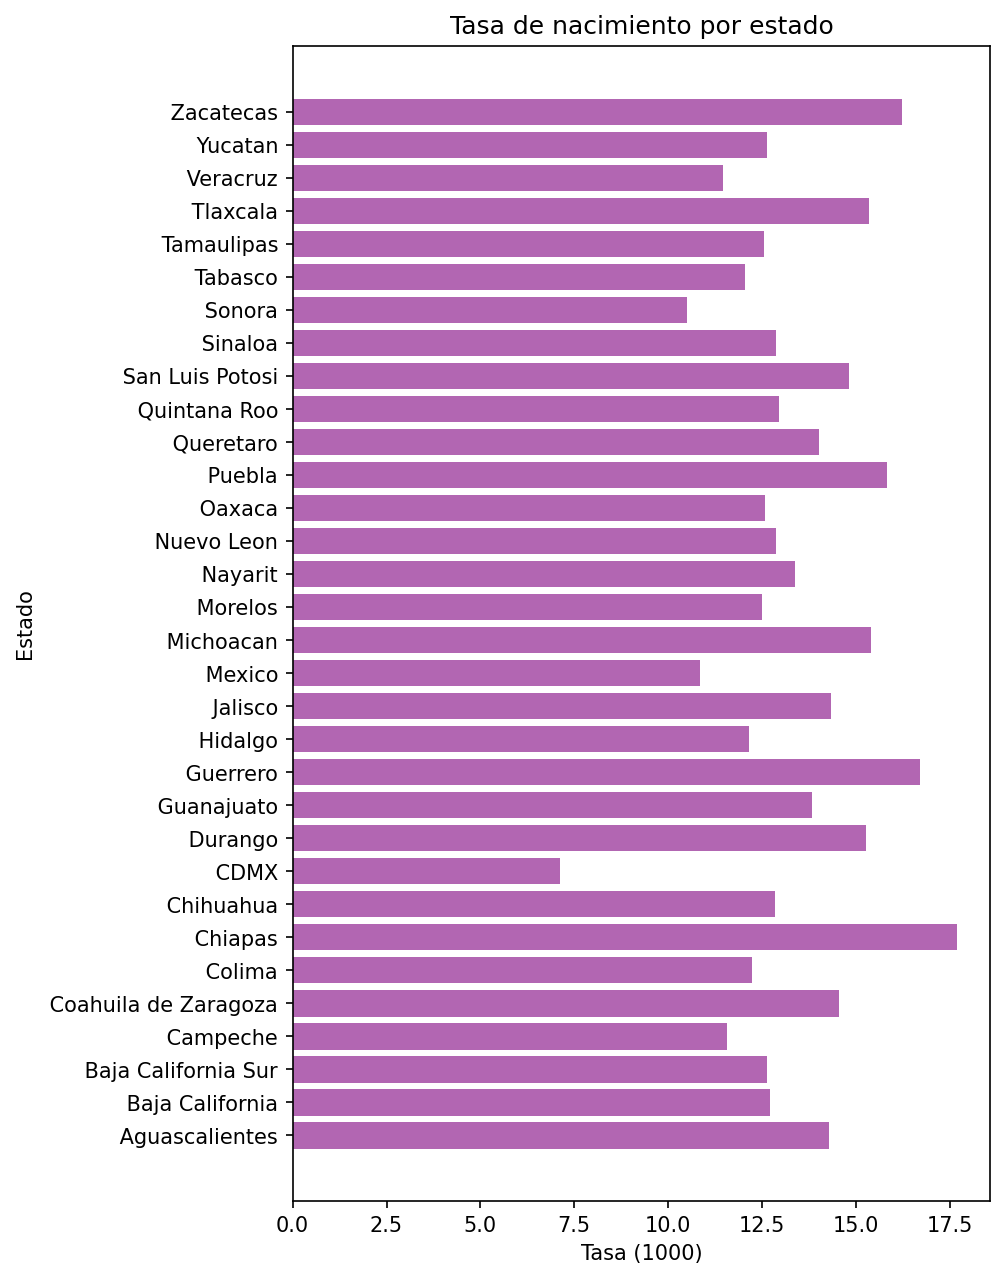

In [22]:
plt.figure(figsize=(6, 10), dpi=150)
plt.barh(n_2020.index, n_2020['Tasa'], color = 'purple', alpha=0.6)
plt.title('Tasa de nacimiento por estado')
plt.ylabel('Estado')
plt.xlabel('Tasa (1000)')
plt.show()

**4**. Guarde en un Dataframe los datos de los precios de las acciones de Tesla (tesla.csv en Github).

El retorno simple mide el cambio porcentual entre el precio de un activo financiero en dos momentos consecutivos. Es útil para analizar la variación de precios, por ejemplo, el precio de cierre diario de una acción. Dado un precio de cierre
 en el tiempo
, el retorno simple se calcula como:




a) Agregue la columna correspondiente a la serie de retornos simples (utilice la función .pct_change()) y elimine la primera fila del DataFrame.

b) Grafique la serie de tiempo de los retornos simples y obtenga:

El retorno simple más alto,
El retorno simple más bajo,
Las fechas en que ocurrieron. la prueba de Shapiro–Wilk.

d) Genere las gráficas de caja por año de los precios de cierre.
c) Obtenga el histograma de frecuencia de la serie de retornos simples.
¿Estos se distribuyen normalmente? Justifique su respuesta calculando el coeficiente de asimetría, kurtosis y haciendo

In [51]:
ruta='https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/tesla.csv'
df=pd.read_csv(ruta)
df.head()

,Date,Open,High,Low,Close,Adj Close
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334


In [52]:
df['Date'] = pd.to_datetime(df['Date'])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       756 non-null    datetime64[ns]
 1   Open       756 non-null    float64       
 2   High       756 non-null    float64       
 3   Low        756 non-null    float64       
 4   Close      756 non-null    float64       
 5   Adj Close  756 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 35.6 KB


In [54]:

df['Retornos simples']=df['Close'].pct_change()
df.head()

,Date,Open,High,Low,Close,Adj Close,Retornos simples
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,NaN
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,0.029633
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,0.019255
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,0.038801
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,0.049205


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              756 non-null    datetime64[ns]
 1   Open              756 non-null    float64       
 2   High              756 non-null    float64       
 3   Low               756 non-null    float64       
 4   Close             756 non-null    float64       
 5   Adj Close         756 non-null    float64       
 6   Retornos simples  755 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 41.5 KB


In [56]:
df=df.drop(df.index[0])
df.head()

,Date,Open,High,Low,Close,Adj Close,Retornos simples
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,0.029633
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,0.019255
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,0.038801
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,0.049205
5,2020-01-09,33.139999,33.253334,31.524668,32.089333,32.089333,-0.021945


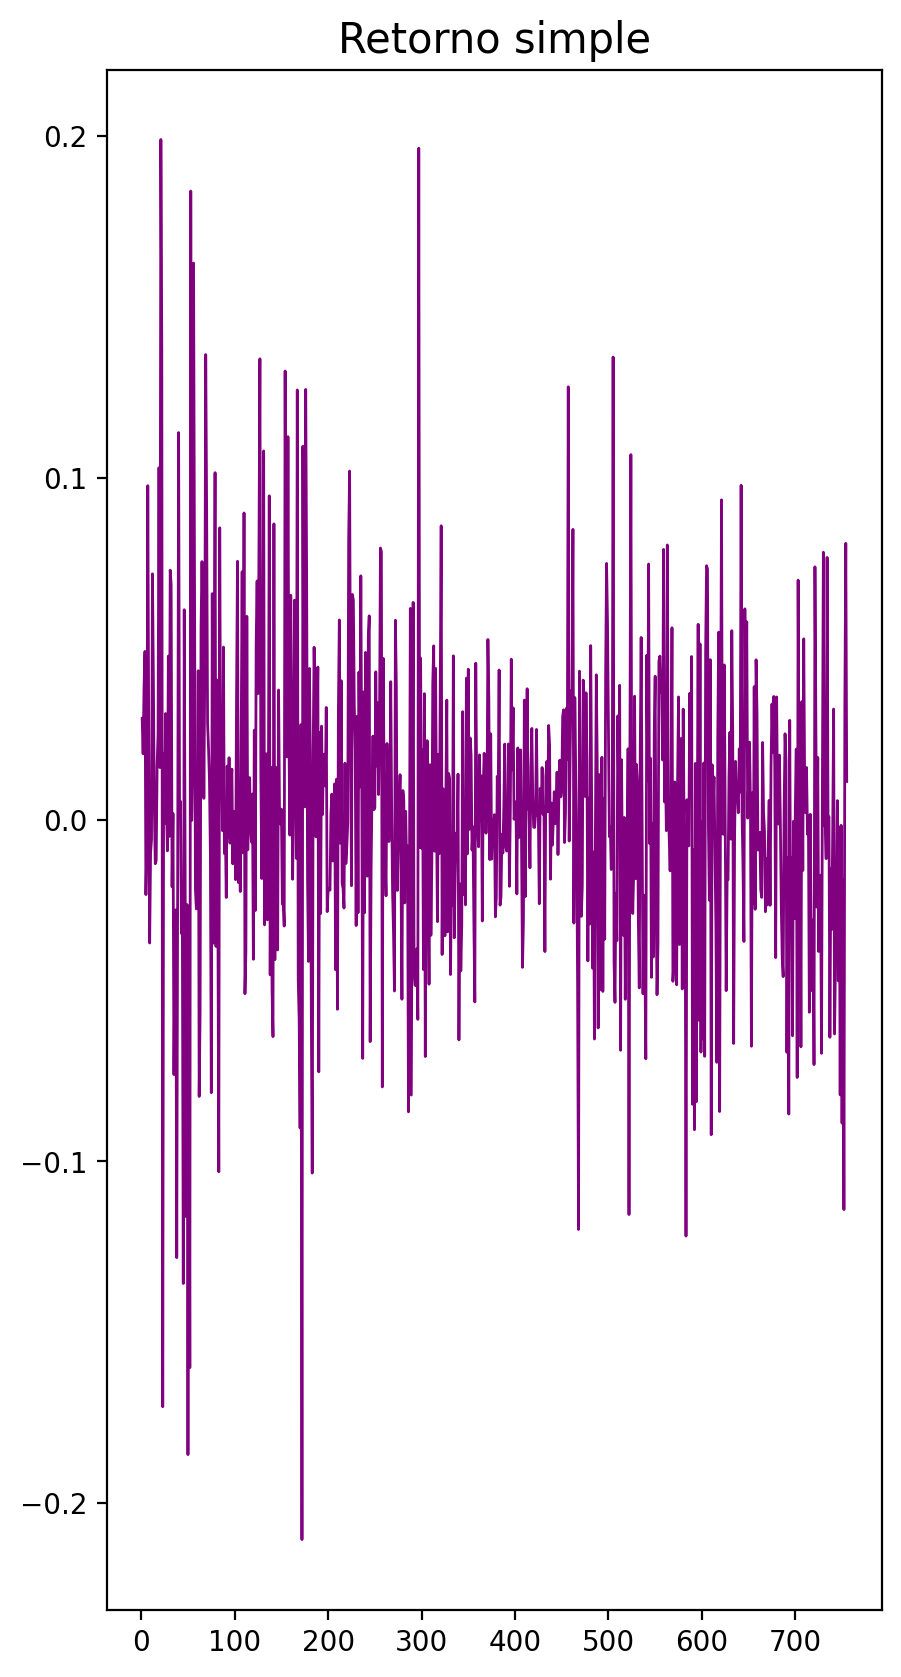

In [58]:
#b) Grafique la serie de tiempo de los retornos simples
#grafica de serie temporal
plt.figure(figsize=(5,10), dpi =200)
plt.plot(df.index,df['Retornos simples'], lw = 1, color='purple')
plt.title('Retorno simple', fontsize=15)
plt.grid(False)


In [59]:
#El retorno simple más alto,
#El retorno simple más bajo,
#Las fechas en que ocurrieron.

print("Máximo:", df.idxmax(), df.max())

Máximo: Date                755
Open                465
High                465
Low                 465
Close               465
Adj Close           465
Retornos simples     21
dtype: int64 Date                2022-12-30 00:00:00
Open                         411.470001
High                         414.496674
Low                          405.666656
Close                        409.970001
Adj Close                    409.970001
Retornos simples               0.198949
dtype: object


el retorno máximo ocurrio en 2020-02-03 con un valor de 0.198949

In [60]:
print("Mínimo:", df.idxmin(), df.min())

Mínimo: Date                  1
Open                 53
High                 52
Low                  52
Close                52
Adj Close            52
Retornos simples    172
dtype: int64 Date                2020-01-03 00:00:00
Open                              24.98
High                          26.990667
Low                           23.367332
Close                         24.081333
Adj Close                     24.081333
Retornos simples              -0.210628
dtype: object


el retorno minimo ocurrio 2020-09-08 con un valor de -0.210628

***c) Obtenga el histograma de frecuencia de la serie de retornos simples.***

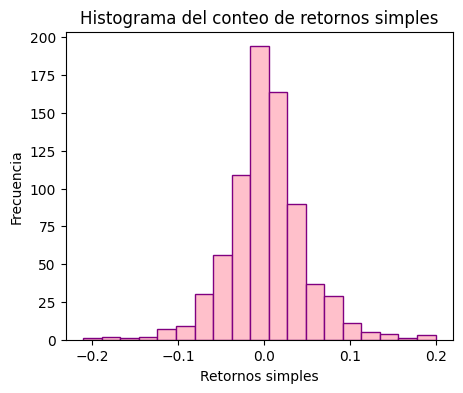

In [61]:
#grafica del histograma de la serie de retornos simples

plt.figure(figsize=(5,4))
plt.hist(df['Retornos simples'], bins=19, color='pink', edgecolor='purple')
plt.title('Histograma del conteo de retornos simples')
plt.xlabel('Retornos simples')
plt.ylabel('Frecuencia')
plt.show()

***¿Estos se distribuyen normalmente? Justifique su respuesta calculando el coeficiente de asimetría, kurtosis y haciendo la prueba de Shapiro–Wilk.***


In [63]:
resumen = pd.DataFrame({
    'Mínimo': df.min(),
    'Q1': df.quantile(0.25),
    'Mediana': df.median(),
    'Q3': df.quantile(0.75),
    'Máximo': df.max(),
    'Asimetría': df.skew(numeric_only=True),
    'Curtosis': df.kurt(numeric_only=True)
})

In [64]:
resumen

,Mínimo,Q1,Mediana,Q3,Máximo,Asimetría,Curtosis
Adj Close,24.081333,138.703331,223.656662,276.763337,409.970001,-0.300317,-0.789155
Close,24.081333,138.703331,223.656662,276.763337,409.970001,-0.300317,-0.789155
Date,2020-01-03 00:00:00,2020-10-01 12:00:00,2021-07-02 00:00:00,2022-03-31 12:00:00,2022-12-30 00:00:00,NaN,NaN
High,26.990667,142.261665,229.330002,283.491669,414.496674,-0.293179,-0.782198
Low,23.367332,135.62667,218.199997,270.511658,405.666656,-0.306408,-0.804483
Open,24.98,138.741669,224.0,278.460007,411.470001,-0.298055,-0.787892
Retornos simples,-0.210628,-0.02148,0.001953,0.024981,0.198949,0.086197,2.745629


El coeficiente de asimetría de Fisher es un coeficiente que permite calcular la asimetría de una distribución. Es decir, el coeficiente de asimetría sirve para determinar si una función es asimétrica positiva, asimétrica negativa o simétrica.( el comando para calcularlo es .skew)
Si el coeficiente de Fisher es mayor a 0  la distribución es asimétrica positiva.
Si el coeficiente de Fisher es menor a 0  la distribución es asimétrica negativa.

Para Open, High, Low, Close y Adj Close podemos concluir que su distribución es  asimétrica negativa. Mientras  que para Retornos simples la distribución es asimétrica positiva.


La curtosis (Kurtosis) define en qué grado las colas de la distribución difieren de las colas de una distribución normal.(.kurt)

Para Open, High, Low, Close y Adj Close podemos concluir que la distribución es platicúrtica (distribución con colas menos largas que la normal).
Mientras  que para Retornos simples la distribución es la distribución es leptocúrtica (distribución con colas más largas que la normal).

In [65]:
#PRUEBA DE Shapiro-Wilk
from scipy.stats import shapiro


In [66]:
columnas = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Retornos simples']

for col in columnas:
    estadistico, p_value = shapiro(df[col])
    print(f'{col}:  Estadístico = {estadistico:.3f}, p-value = {p_value:.10f}\n')

Open:  Estadístico = 0.955, p-value = 0.0000000000

High:  Estadístico = 0.955, p-value = 0.0000000000

Low:  Estadístico = 0.955, p-value = 0.0000000000

Close:  Estadístico = 0.955, p-value = 0.0000000000

Adj Close:  Estadístico = 0.955, p-value = 0.0000000000

Retornos simples:  Estadístico = 0.964, p-value = 0.0000000000



Un valor $p < 0.05$, indica evidencia suficiente contra la normalidad de los datos, sugiriendo que se rechace $H_{0}$. Y como el $p$ obtenido en los datos es menor a $0.05$, por tanto no se distribuyen los datos normalmente.

***d) Genere las gráficas de caja por año de los precios de cierre.***

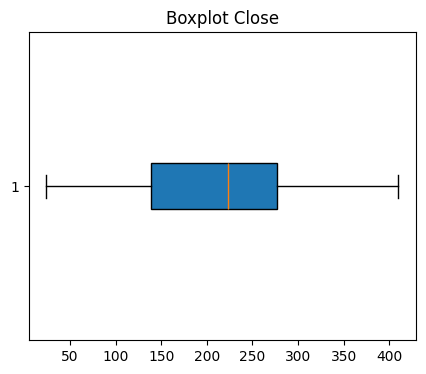

In [67]:
plt.figure(figsize=(5,4))
plt.boxplot(df['Close'], vert = False, patch_artist=True ) # para detectar datos atipicos
plt.title('Boxplot Close')
plt.show()

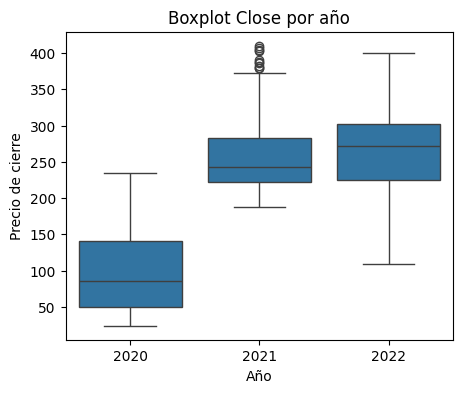

In [70]:
df['Year'] = df['Date'].dt.year

plt.figure(figsize=(5,4))
sns.boxplot(x='Year', y='Close',data=df) # para detectar datos atipicos
plt.title('Boxplot Close por año')
plt.xlabel('Año')
plt.ylabel('Precio de cierre')
plt.show()

Ejercicio 5.

Guarde en un DataFrame los datos de los 6 contaminantes principales de la ciudad de Puebla a partir del año 2016 (contam_PUE_ugm3.csv en GitHub). A continuación, realice lo siguiente:

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Rutap='https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/contam_PUE_ugm3.csv'
contam = pd.read_csv(Rutap, parse_dates = True, index_col=0)
contam.head()

,O3,PM10,PM25,SO2,CO,NO2
Fecha,,,,,,
2016-01-01,0.028414,44.694444,28.097222,0.003244,1.763388,0.020635
2016-01-02,0.027376,31.527778,13.791667,0.003339,1.796858,0.022468
2016-01-03,0.032512,44.333333,20.430556,0.003551,1.845788,0.023123
2016-01-04,0.028332,24.990338,9.569444,0.003051,1.756417,0.020897
2016-01-05,0.026939,21.763889,10.638889,0.003296,1.782832,0.021215


In [72]:
contam.columns =['O3', 'PM10', 'PM25', 'SO2', 'CO', 'NO2']

In [73]:
contam.describe()

,O3,PM10,PM25,SO2,CO,NO2
count,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000
mean,0.044932,41.575854,17.122126,0.003486,1.195836,0.025427
std,0.013539,15.498889,7.403356,0.001189,0.398137,0.007780
min,0.014422,5.739899,1.666667,0.000856,0.326635,0.007823
25%,0.035606,30.194444,11.781840,0.002627,0.931935,0.020079
50%,0.042851,39.930556,15.692633,0.003374,1.114111,0.024406
75%,0.051064,51.951389,21.654891,0.004087,1.370332,0.030052
max,0.103337,109.680556,59.158432,0.010058,2.932127,0.059077


a) Obtenga las gráficas de series de tiempo** de todos los contaminantes, los gráficos de caja, y calcule el número de datos atípicos de cada uno.

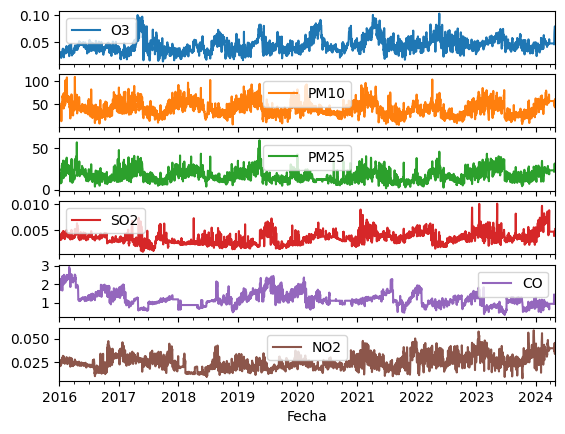

In [40]:
contam.plot(subplots=True)
plt.show()

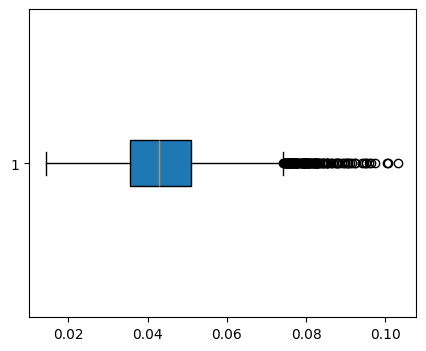

In [74]:
plt.figure(figsize=(5,4))
plt.boxplot(contam['O3'],
            vert = False,
            patch_artist=True) # vert = False,
plt.show()

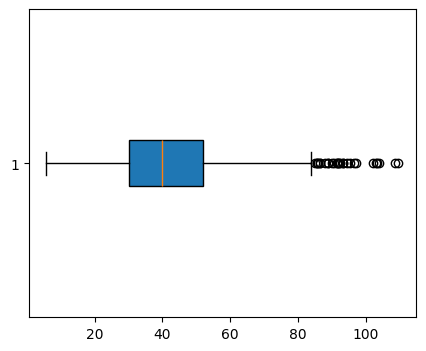

In [75]:
plt.figure(figsize=(5,4))
plt.boxplot(contam['PM10'],
            vert = False,
            patch_artist=True) # vert = False,
plt.show()

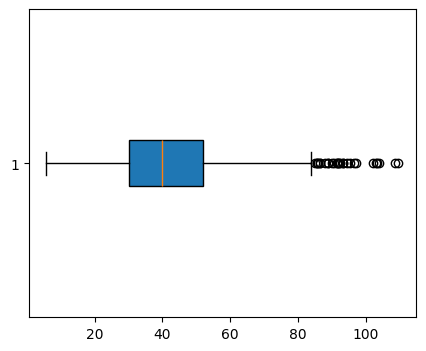

In [76]:
plt.figure(figsize=(5,4))
plt.boxplot(contam['PM10'],
            vert = False,
            patch_artist=True) # vert = False,
plt.show()

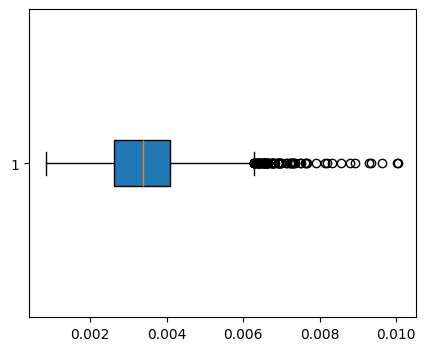

In [77]:
plt.figure(figsize=(5,4))
plt.boxplot(contam['SO2'],
            vert = False,
            patch_artist=True) # vert = False,
plt.show()

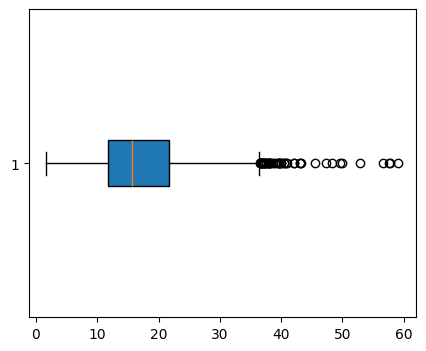

In [45]:
plt.figure(figsize=(5,4))
plt.boxplot(contam['PM25'],
            vert = False,
            patch_artist=True) # vert = False,
plt.show()

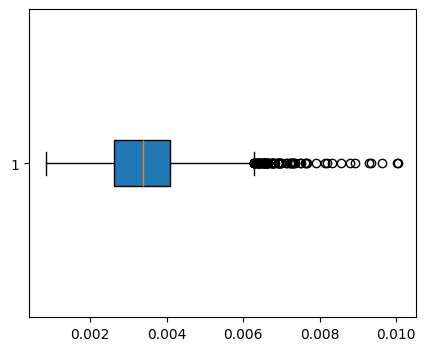

In [46]:
plt.figure(figsize=(5,4))
plt.boxplot(contam['SO2'],
            vert = False,
            patch_artist=True) # vert = False,
plt.show()

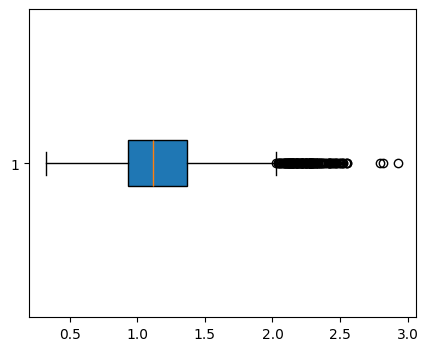

In [78]:
plt.figure(figsize=(5,4))
plt.boxplot(contam['CO'],
            vert = False,
            patch_artist=True) # vert = False,
plt.show()

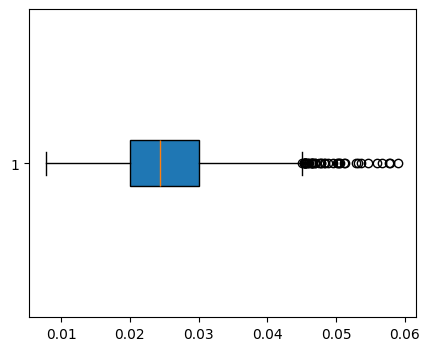

In [48]:
plt.figure(figsize=(5,4))
plt.boxplot(contam['NO2'],
            vert = False,
            patch_artist=True) # vert = False,
plt.show()

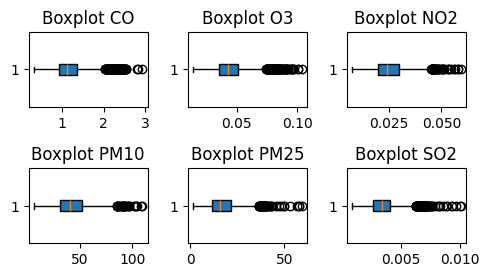

In [81]:
plt.figure(figsize=(5,4))
plt.subplot(3,3,1)
plt.boxplot(contam['CO'], vert = False, patch_artist=True ) # para detectar datos atipicos
plt.title('Boxplot CO')

plt.subplot(3,3,2)
plt.boxplot(contam['O3'], vert = False, patch_artist=True )
plt.title('Boxplot O3')

plt.subplot(3,3,3)
plt.boxplot(contam['NO2'], vert = False, patch_artist=True )
plt.title('Boxplot NO2')

plt.subplot(3,3,4)
plt.boxplot(contam['PM10'], vert = False, patch_artist=True )
plt.title('Boxplot PM10')

plt.subplot(3,3,5)
plt.boxplot(contam['PM25'], vert = False, patch_artist=True )
plt.title('Boxplot PM25')

plt.subplot(3,3,6)
plt.boxplot(contam['SO2'], vert = False, patch_artist=True )
plt.title('Boxplot SO2')


plt.tight_layout()
plt.show()

***b) Realice una prueba de contraste de normalidad para los datos. Obtenga una matriz de correlación y un mapa de calor de los contaminantes utilizando el coeficiente de correlación apropiado.***

In [84]:
from scipy.stats import shapiro

In [86]:
columnas = ['O3', 'PM10', 'PM25', 'SO2', 'CO', 'NO2']

for col in columnas:
    estadistico, p_value = shapiro(contam[col])
    print(f'{col}:  Estadístico = {estadistico:.3f}, p-value = {p_value:.10f}\n')

O3:  Estadístico = 0.948, p-value = 0.0000000000

PM10:  Estadístico = 0.978, p-value = 0.0000000000

PM25:  Estadístico = 0.947, p-value = 0.0000000000

SO2:  Estadístico = 0.952, p-value = 0.0000000000

CO:  Estadístico = 0.940, p-value = 0.0000000000

NO2:  Estadístico = 0.973, p-value = 0.0000000000



Todos los valores de  p  en los datos de los contaminantes son menores que  0.05  por tanto podemos decir que no se distribuyen normalmente.

In [87]:
contam.corr(method='spearman')

,O3,PM10,PM25,SO2,CO,NO2
O3,1.000000,0.153624,0.222908,0.181364,-0.140142,0.152639
PM10,0.153624,1.000000,0.801181,0.184809,0.077875,0.295981
PM25,0.222908,0.801181,1.000000,0.144050,-0.010204,0.315743
SO2,0.181364,0.184809,0.144050,1.000000,0.133664,0.340807
CO,-0.140142,0.077875,-0.010204,0.133664,1.000000,-0.007370
NO2,0.152639,0.295981,0.315743,0.340807,-0.007370,1.000000


In [88]:
import seaborn as sns

In [89]:
corr_mat = contam.corr(method='spearman')

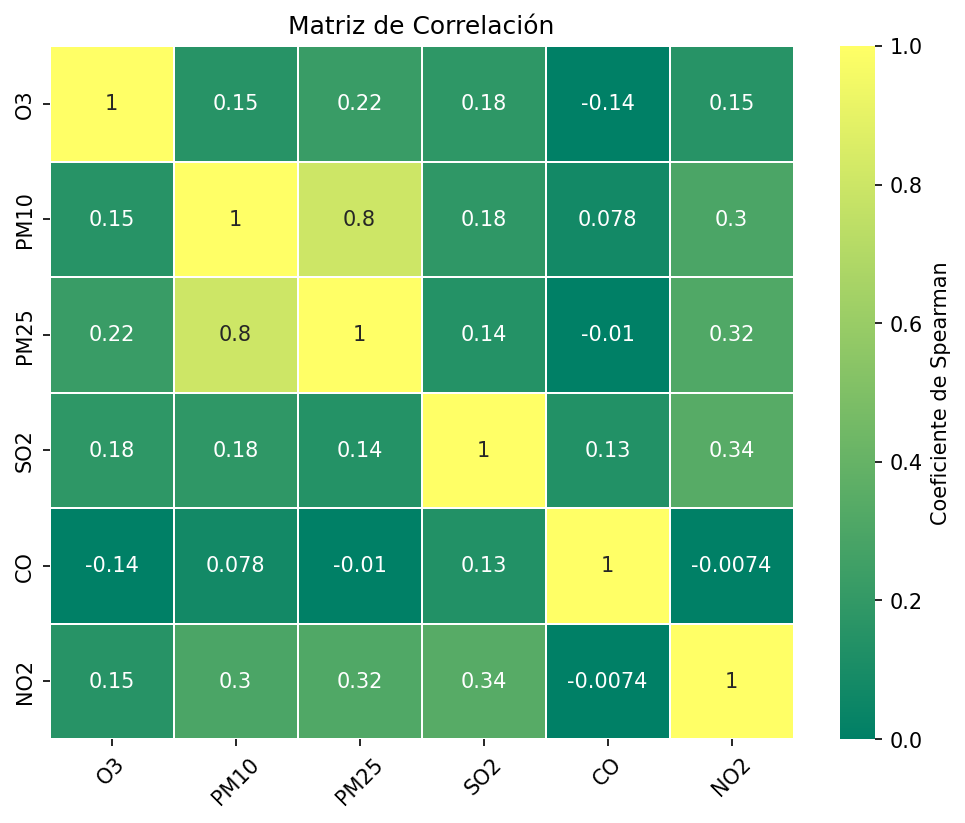

In [91]:
plt.figure(figsize=(8, 6),dpi=150)
sns.heatmap(corr_mat, annot=True,
            cmap='summer',
            linewidths=0.2,
            cbar_kws={'label': 'Coeficiente de Spearman'},
           vmin = 0, vmax = 1, center = 0.5)
plt.title('Matriz de Correlación', fontsize=12)
plt.xticks(rotation=45)
plt.show()

c) Obtenga un DataFrame que muestre la correlación 2 a 2 entre los contaminantes.
Grafique 3 diagramas de dispersión** entre los contaminantes que presentan mayor correlación, ya sea positiva o negativa **texto en negrita**.

In [92]:
pip install pingouin # sirve para instalar paqueterias

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 8.5 MB/s eta 0:00:00


In [93]:
import pingouin as pg

In [94]:
corr = pg.pairwise_corr(contam, method='spearman')#muestra la correlación 2 a 2 entre los contaminantes

In [96]:
corr

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,O3,PM10,spearman,two-sided,3043,0.153624,"[0.12, 0.19]",1.573967e-17,1.000000
1,O3,PM25,spearman,two-sided,3043,0.222908,"[0.19, 0.26]",1.429071e-35,1.000000
2,O3,SO2,spearman,two-sided,3043,0.181364,"[0.15, 0.22]",6.484569e-24,1.000000
3,O3,CO,spearman,two-sided,3043,-0.140142,"[-0.17, -0.11]",8.108908e-15,1.000000
4,O3,NO2,spearman,two-sided,3043,0.152639,"[0.12, 0.19]",2.534005e-17,1.000000
5,PM10,PM25,spearman,two-sided,3043,0.801181,"[0.79, 0.81]",0.000000e+00,1.000000
6,PM10,SO2,spearman,two-sided,3043,0.184809,"[0.15, 0.22]",8.749569e-25,1.000000
7,PM10,CO,spearman,two-sided,3043,0.077875,"[0.04, 0.11]",1.703335e-05,0.990439
8,PM10,NO2,spearman,two-sided,3043,0.295981,"[0.26, 0.33]",1.399951e-62,1.000000
9,PM25,SO2,spearman,two-sided,3043,0.144050,"[0.11, 0.18]",1.408574e-15,1.000000


In [97]:
corr.sort_values(by=['r'], ascending=False)[['X', 'Y', 'r']].round(3)

,X,Y,r
5,PM10,PM25,0.801
13,SO2,NO2,0.341
11,PM25,NO2,0.316
8,PM10,NO2,0.296
1,O3,PM25,0.223
6,PM10,SO2,0.185
2,O3,SO2,0.181
0,O3,PM10,0.154
4,O3,NO2,0.153
9,PM25,SO2,0.144


Obtenga un diagrama de dispersión de los 2 contaminantes donde existe más correlación.

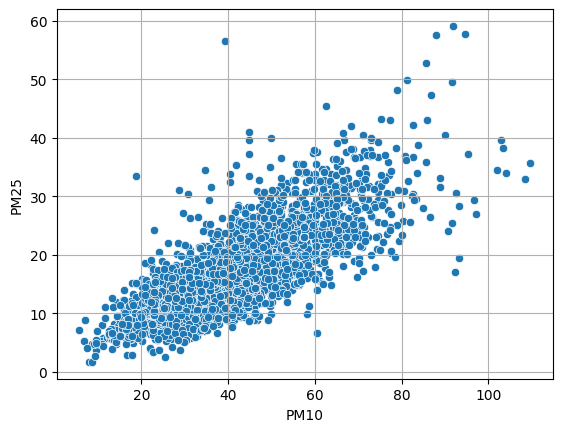

In [100]:
#diagrama de dispersion  de los 2 contaminantes donde existe más correlación.

sns.scatterplot(data=contam, x='PM10', y='PM25')
plt.grid(True)
plt.show()

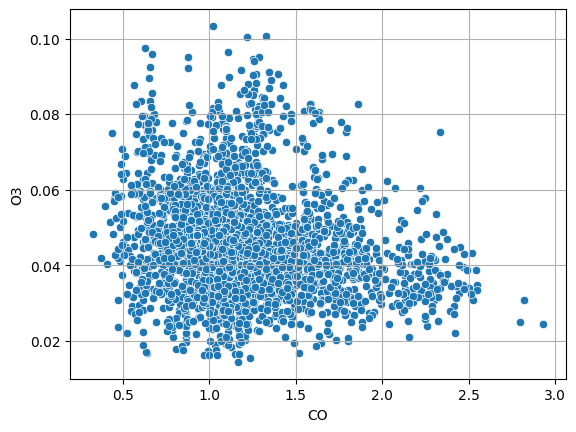

In [102]:
#diagrama de dispersion  de los 2 contaminantes donde existe menos correlación.

sns.scatterplot(data=contam, x='CO', y='O3')
plt.grid(True)
plt.show()

In [104]:
pip install pymannkendall

***d) Aplique el test de Mann-Kendall a todos los contaminantes y obtenga una gráfica con la línea de tendencia de cada uno (en caso de que exista).***

In [105]:
import pymannkendall as mk

In [107]:
resultado1 = mk.original_test(contam['PM25'], alpha=0.05)
resultado2 = mk.original_test(contam['PM10'], alpha=0.05)
resultado3 = mk.original_test(contam['CO'], alpha=0.05)
resultado4 = mk.original_test(contam['O3'], alpha=0.05)
resultado5 = mk.original_test(contam['NO2'], alpha=0.05)
resultado6 = mk.original_test(contam['SO2'], alpha=0.05)

In [108]:
contam.colums = ['O3', 'PM10', 'PM25', 'SO2', 'CO', 'NO2']

In [109]:
for valor in resultado1: #arroja todos los valores que estan en resultado
    print(valor)

decreasing
True
0.01117620157945054
-2.537140732486618
-0.030679912704230813
-141999.0
3132386471.0
-0.0003692726766993715
16.254296591501287


In [110]:
for valor in resultado2: #arroja todos los valores que estan en resultado
    print(valor)

decreasing
True
6.661338147750939e-15
-7.7914418728468355
-0.09421629879679881
-436071.0
3132396641.6666665
-0.0025048446024340293
43.740424195857706


In [111]:
for valor in resultado3: #arroja todos los valores que estan en resultado
    print(valor)

decreasing
True
0.0
-18.73453024620918
-0.22653321242769914
-1048487.0
3132129109.6666665
-0.00013034442788541125
1.3123647582381186


In [112]:
for valor in resultado4: #arroja todos los valores que estan en resultado
    print(valor)

increasing
True
0.0
17.591507915746828
0.21272110488218074
984559.0
3132394657.6666665
4.097957091780723e-06
0.036618215678404814


In [113]:
for valor in resultado5: #arroja todos los valores que estan en resultado
    print(valor)

increasing
True
0.0
17.235795094562977
0.208419621195475
964650.0
3132391177.3333335
2.8175689112537964e-06
0.020120591073960775


In [114]:
for valor in resultado6: #arroja todos los valores que estan en resultado
    print(valor)

increasing
True
0.0
15.533965649282166
0.18784081680009282
869403.0
3132395482.3333335
3.6216698450634786e-07
0.0028233345947905448


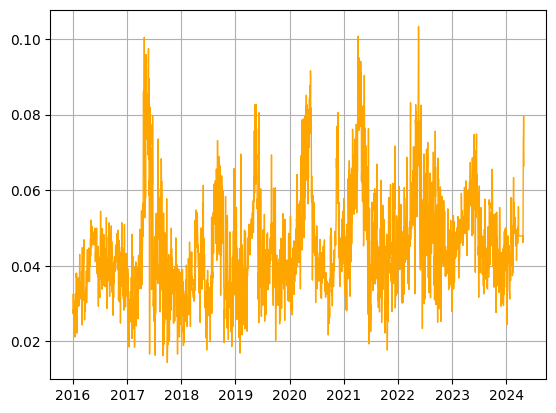

In [115]:
plt.plot(figsize=(15,7),dpi=100)
plt.plot(contam['O3'],lw=1, color='orange')
plt.tick_params(labelsize=10)
plt.grid(True)

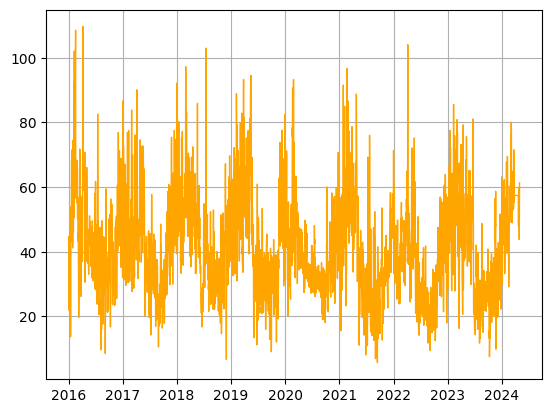

In [116]:
plt.plot(figsize=(15,7),dpi=100)
plt.plot(contam['PM10'],lw=1, color='orange')
plt.tick_params(labelsize=10)
plt.grid(True)

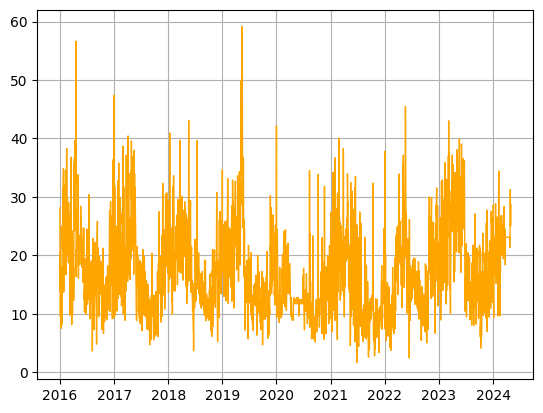

In [117]:
plt.plot(figsize=(15,7),dpi=100)
plt.plot(contam['PM25'],lw=1, color='orange')
plt.tick_params(labelsize=10)
plt.grid(True)

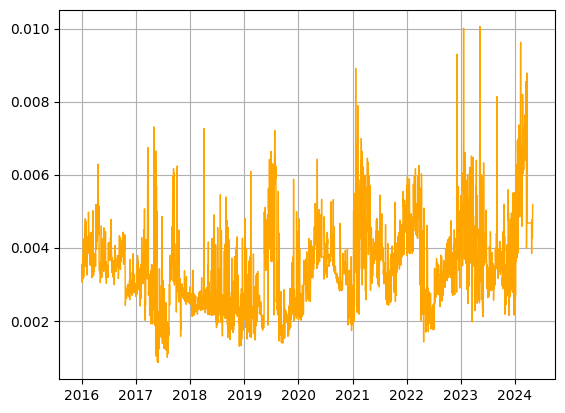

In [118]:
plt.plot(figsize=(15,7),dpi=100)
plt.plot(contam['SO2'],lw=1, color='orange')
plt.tick_params(labelsize=10)
plt.grid(True)

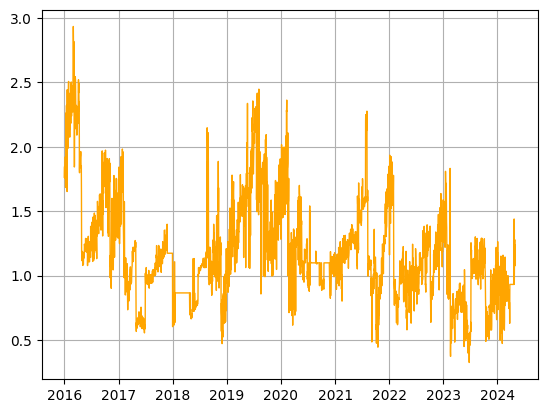

In [119]:
plt.plot(figsize=(15,7),dpi=100)
plt.plot(contam['CO'],lw=1, color='orange')
plt.tick_params(labelsize=10)
plt.grid(True)

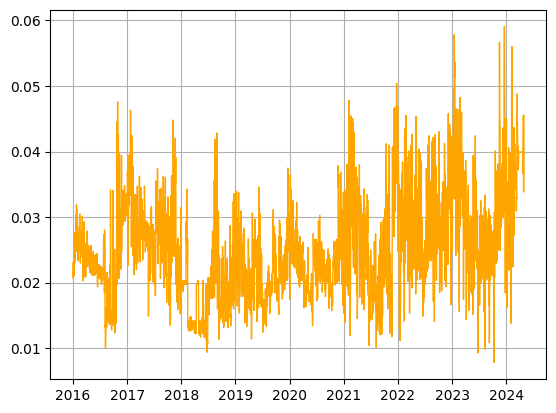

In [120]:
plt.plot(figsize=(15,7),dpi=100)
plt.plot(contam['NO2'],lw=1, color='orange')
plt.tick_params(labelsize=10)
plt.grid(True)

In [121]:
slope = mk.original_test(contam['PM25'], alpha=0.05).slope
intercept = mk.original_test(contam['PM25'], alpha=0.05).intercept
print(slope)
print(intercept)

-0.0003692726766993715
16.254296591501287
